In [8]:
words = open("Indian_Names.txt", "r").read().splitlines()

In [46]:
words = [w.lower() for w in words]


In [47]:
import random

random.shuffle(words)

In [48]:
words[:10]

['rogitha',
 'kiru',
 'sabishan',
 'nishothai',
 'ushaana',
 'vagitha',
 'ritheeshkumar',
 'bilwa',
 'vidyarthi',
 'paksha']

In [49]:
len(words)

53982

In [50]:
min(len(w) for w in words)

2

In [51]:
max(len(w) for w in words)

24

In [52]:
b ={}
for w in words:
    chs = ["<s>"] + list(w) + ["<E>"]
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram ,0) + 1
        # print(ch1,ch2)

In [53]:
sorted(b.items() ,key = lambda kv:-kv[1])

[(('a', 'n'), 25646),
 (('h', 'a'), 18167),
 (('a', '<E>'), 16312),
 (('t', 'h'), 15185),
 (('s', 'h'), 14246),
 (('n', '<E>'), 13513),
 (('a', 'r'), 10752),
 (('r', 'a'), 10543),
 (('i', '<E>'), 8863),
 (('h', 'i'), 8170),
 (('n', 'a'), 7889),
 (('y', 'a'), 7506),
 (('n', 'i'), 6941),
 (('k', 'a'), 6619),
 (('<s>', 'a'), 6476),
 (('v', 'a'), 6045),
 (('m', 'a'), 5546),
 (('a', 's'), 5382),
 (('a', 't'), 5185),
 (('i', 'n'), 5154),
 (('<s>', 's'), 5140),
 (('r', 'i'), 4935),
 (('i', 't'), 4881),
 (('h', '<E>'), 4551),
 (('l', 'a'), 4496),
 (('a', 'a'), 4483),
 (('v', 'i'), 4469),
 (('i', 's'), 4328),
 (('<s>', 'k'), 4233),
 (('e', 'e'), 4232),
 (('s', 'a'), 4203),
 (('<s>', 'v'), 4106),
 (('<s>', 'm'), 3849),
 (('a', 'm'), 3845),
 (('a', 'l'), 3842),
 (('a', 'v'), 3635),
 (('<s>', 'n'), 3551),
 (('e', 's'), 3516),
 (('<s>', 'r'), 3353),
 (('j', 'a'), 3343),
 (('i', 'k'), 3324),
 (('<s>', 'p'), 3289),
 (('d', 'h'), 3034),
 (('n', 't'), 3025),
 (('e', 'n'), 3011),
 (('<s>', 'd'), 2965),


In [ ]:
import torch

In [68]:
N  = torch.zeros((27,27) ,dtype =torch.int32)  # 3 rows, 5 columns

In [70]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}

In [73]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

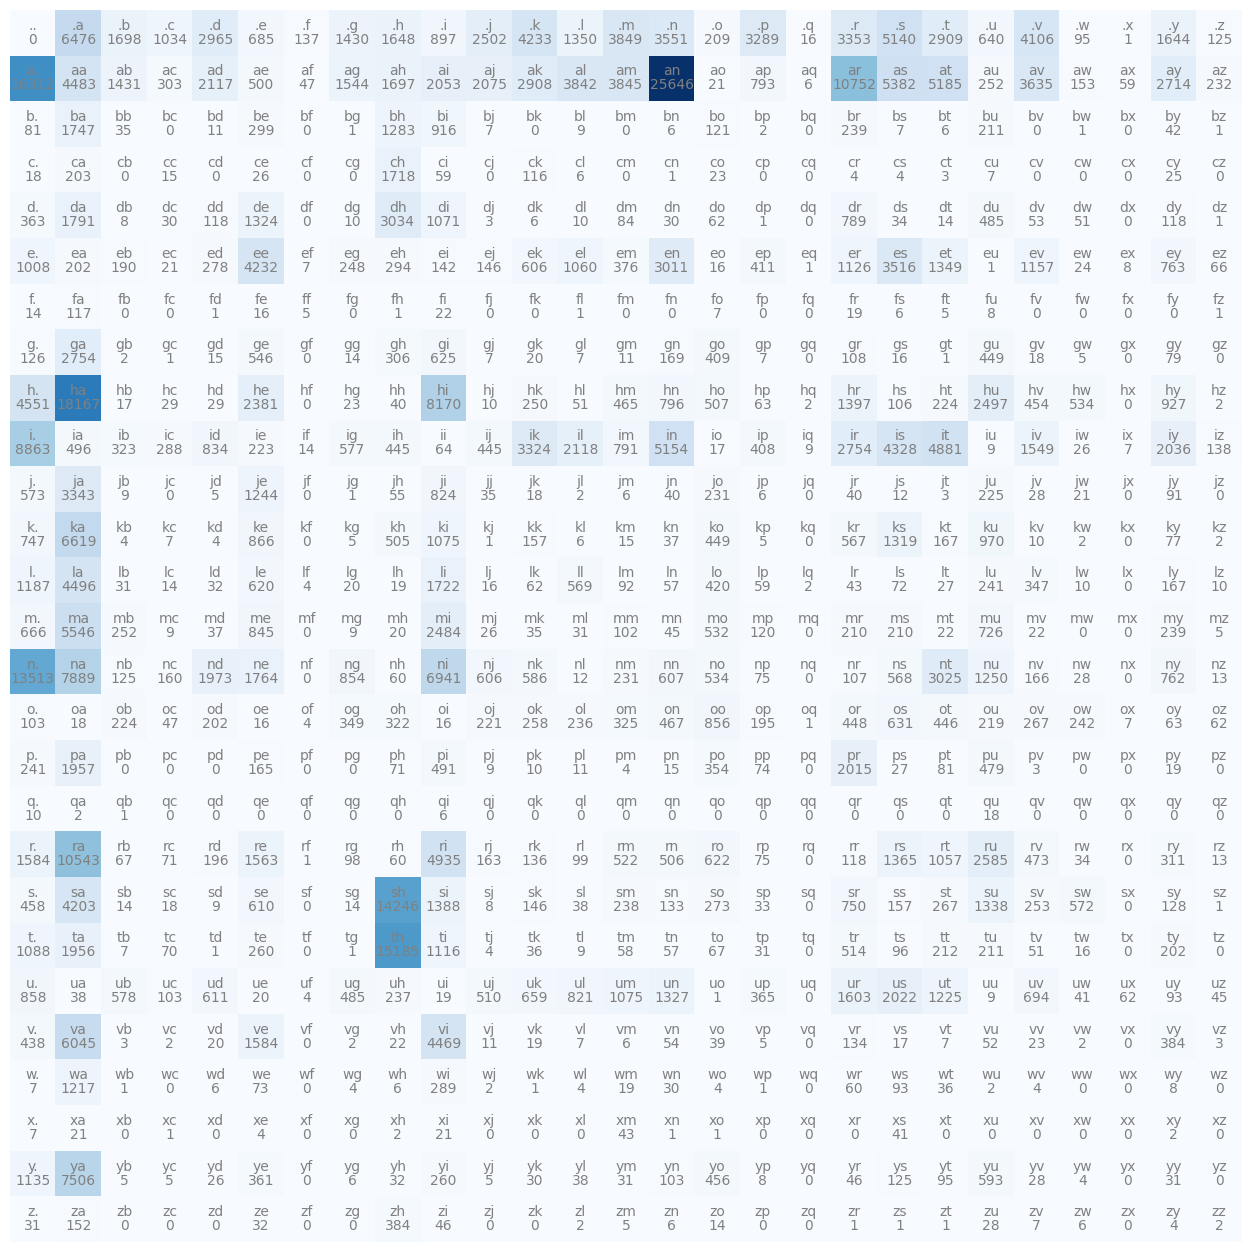

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [80]:
N[0]

tensor([   0, 6476, 1698, 1034, 2965,  685,  137, 1430, 1648,  897, 2502, 4233,
        1350, 3849, 3551,  209, 3289,   16, 3353, 5140, 2909,  640, 4106,   95,
           1, 1644,  125], dtype=torch.int32)

In [87]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000e+00, 1.1997e-01, 3.1455e-02, 1.9155e-02, 5.4926e-02, 1.2689e-02,
        2.5379e-03, 2.6490e-02, 3.0529e-02, 1.6617e-02, 4.6349e-02, 7.8415e-02,
        2.5008e-02, 7.1302e-02, 6.5781e-02, 3.8717e-03, 6.0928e-02, 2.9640e-04,
        6.2113e-02, 9.5217e-02, 5.3888e-02, 1.1856e-02, 7.6062e-02, 1.7598e-03,
        1.8525e-05, 3.0455e-02, 2.3156e-03])

In [90]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'd'

In [84]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3,generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [86]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 2, 0])

In [103]:
P = N.float()
P /= P.sum(dim=1, keepdim=True)

In [101]:
P[0].sum()

tensor(1.0000)

In [104]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        # p = N[ix].float()
        # p = p/p.sum()
        p = P[ix]
        # p = torch.ones(27)/27.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))


deeba.
pogakurari.
jitaharvinimithain.
lanak.
kan.
